Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2018/2019
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 26. listopada 2018.*

(c) 2015-2018 Jan Šnajder, Domagoj Alagić  

Objavljeno: **26. listopada 2018.**  
Rok za predaju: **5. studenog 2018. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [615]:
# Učitaj osnovne biblioteke...
import sklearn
import sys
sys.path.append('/home/filip/Downloads/mlutils_fer.py')
import mlutils_fer
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [616]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [617]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Predvidene vrijednosti:
[1 1 1 1 0 0 0]
Stvarne vrijednosti:
[1 1 1 1 0 0 0]

Tocnost predvidanja je:  1.0


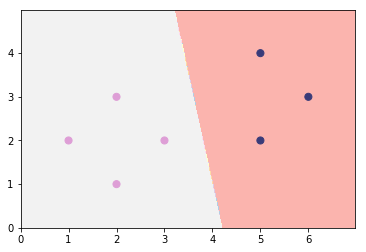

In [618]:
ridge = RidgeClassifier(alpha=0)
ridge.fit(seven_X, seven_y)

y_predicted = ridge.predict(seven_X)
print('Predvidene vrijednosti:\n{}\nStvarne vrijednosti:\n{}\n'.format(y_predicted, seven_y))

accuracy = accuracy_score(seven_y, y_predicted)
print('Tocnost predvidanja je: ', accuracy)

mlutils_fer.plot_2d_clf_problem(seven_X, seven_y, lambda x : ridge.predict(x) >= 0.5)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

In [619]:
reg = LinearRegression().fit(seven_X, seven_y)

y_predicted = reg.predict(seven_X)

for i, y in enumerate(y_predicted):
    if y >= 0.5:
        y_predicted[i] = 1
    else:
        y_predicted[i] = 0 
        
print('Predvidene vrijednosti:\n{}\nStvarne vrijednosti:\n{}\n'.format(y_predicted, seven_y))

accuracy = accuracy_score(seven_y, y_predicted)
print('Tocnost predvidanja je: ', accuracy)

Predvidene vrijednosti:
[1. 1. 1. 1. 0. 0. 0.]
Stvarne vrijednosti:
[1 1 1 1 0 0 0]

Tocnost predvidanja je:  1.0


**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [620]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Predvidene vrijednosti:
[1 1 1 1 0 1 0 0]
Stvarne vrijednosti:
[1 1 1 1 0 0 0 0]

Tocnost predvidanja je:  0.875


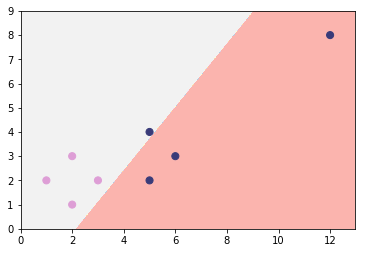

In [621]:
ridge = RidgeClassifier(alpha=0)
ridge.fit(outlier_X, outlier_y)

y_predicted = ridge.predict(outlier_X)
print('Predvidene vrijednosti:\n{}\nStvarne vrijednosti:\n{}\n'.format(y_predicted, outlier_y))

accuracy = accuracy_score(outlier_y, y_predicted)
print('Tocnost predvidanja je: ', accuracy)

mlutils_fer.plot_2d_clf_problem(outlier_X, outlier_y, lambda x : ridge.predict(x) >= 0.5)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [622]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Predvidene vrijednosti:
[1 1 1 1 0 0 0 1]
Stvarne vrijednosti:
[1 1 1 1 0 0 0 0]

Tocnost predvidanja je:  0.875


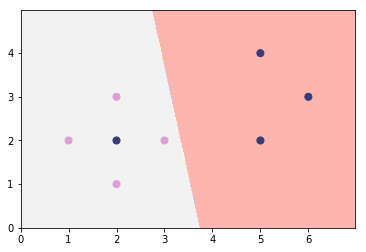

In [623]:
ridge = RidgeClassifier(alpha=0)
ridge.fit(unsep_X, unsep_y)

y_predicted = ridge.predict(unsep_X)
print('Predvidene vrijednosti:\n{}\nStvarne vrijednosti:\n{}\n'.format(y_predicted, unsep_y))

accuracy = accuracy_score(unsep_y, y_predicted)
print('Tocnost predvidanja je: ', accuracy)

mlutils_fer.plot_2d_clf_problem(unsep_X, unsep_y, lambda x : ridge.predict(x) >= 0.5)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

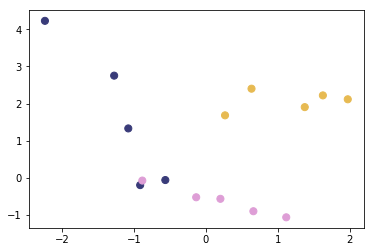

In [624]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=15, n_features=2, n_classes=3, n_redundant=0, n_repeated=0, n_informative=2, n_clusters_per_class=1)
mlutils_fer.plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

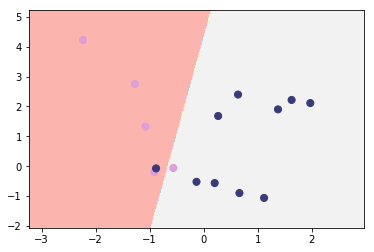

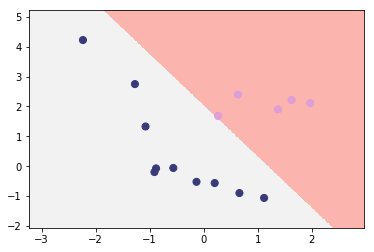

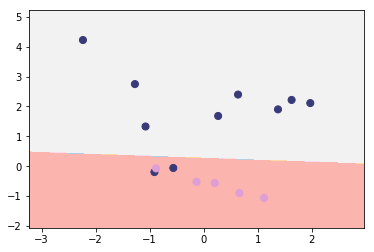

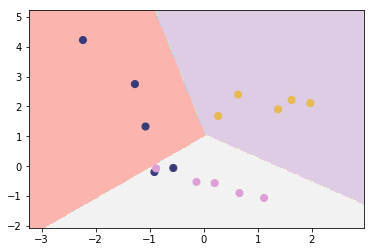

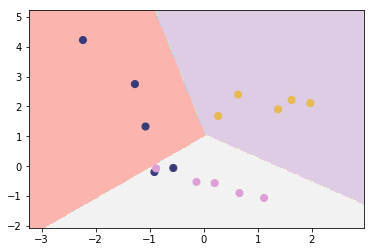

In [625]:
y1=[]
y2=[]
y3=[]

for i in y:
    if i==0:
        y1.append(1)
        y2.append(0)
        y3.append(0)
    elif i==1:
        y1.append(0)
        y2.append(1)
        y3.append(0)
    elif i==2:
        y1.append(0)
        y2.append(0)
        y3.append(1)
        
figure()
reg1 = LinearRegression().fit(X, y1)
mlutils_fer.plot_2d_clf_problem(X, y1, lambda x : reg1.predict(x) <= 0.5)
figure()
reg2 = LinearRegression().fit(X, y2)
mlutils_fer.plot_2d_clf_problem(X, y2, lambda x : reg2.predict(x) <= 0.5)
figure()
reg3 = LinearRegression().fit(X, y3)
mlutils_fer.plot_2d_clf_problem(X, y3, lambda x : reg3.predict(x) <= 0.5)

figure()
predict = lambda x: argmax([reg1.predict(x.reshape(1,-1)), reg2.predict(x.reshape(1,-1)), reg3.predict(x.reshape(1,-1))])
mlutils_fer.plot_2d_clf_problem(X, y, predict)

ridge = RidgeClassifier(alpha=0)
ridge.fit(X, y)

figure()
mlutils_fer.plot_2d_clf_problem(X, y, lambda x : ridge.predict(x))

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

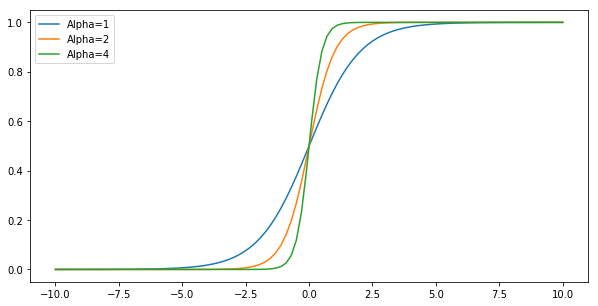

In [626]:
def sigm(x): return 1/(1 + exp(-x))

x = linspace(-10, 10, 100)
alpha = [1, 2, 4]

figure(figsize=(10,5))

for a in alpha:
    sigmx = sigm(a*x)
    plot(x, sigmx)
plt.legend(['Alpha={}'.format(alpha[0]), 'Alpha={}'.format(alpha[1]), 'Alpha={}'.format(alpha[2])], loc='best')

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [627]:
from sklearn.metrics import log_loss
from sklearn.preprocessing import PolynomialFeatures

def cross_entropy_error(X, y, w):
    Phi = PolynomialFeatures(1).fit_transform(X)
    return log_loss(y, sigm(Phi.dot(w)))

def lr_h(x, w):
    Phi = PolynomialFeatures(1).fit_transform(x.reshape(1,-1))
    return sigm(Phi.dot(w))
    
def lr_train(X, y, eta = 0.01, max_iter = 2000, alpha = 0, epsilon = 0.0001, trace= False):
    w_tilda = zeros(shape(X)[1] + 1)
    N = len(X)
    w_trace = []
    err_init = -1
    
    for i in range(0, max_iter):
        dw0 = 0
        dw = zeros(shape(X)[1])
        err = 0
        
        for j in range(0, N):
            h = lr_h(X[j], w_tilda)
            dw0 += h - y[j]
            dw += (h - y[j])*X[j]
            err += (-y[j] * log(h) - (1 - y[j]) * log(1 - h))

        if abs(err_init - err) < epsilon: 
            break
        
        else:
            err_init = err
            
        w_tilda[0] -= eta*dw0
        w_tilda[1:] = w_tilda[1:] * (1-eta*alpha) - eta*dw
        
        w_trace.extend(w_tilda)
        
    if trace:
        return w_tilda, w_trace
        
    else: 
        return w_tilda

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

Dobivene tezine su:
[ 6.44 -2.11  0.54]
Pogreska unakrsne entropije:  0.07751718252492557


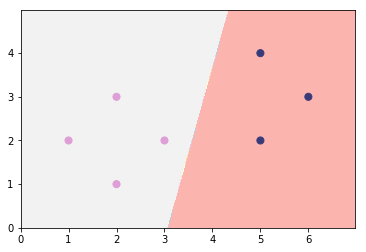

In [628]:
w = lr_train(seven_X, seven_y)
print('Dobivene tezine su:\n{}'.format(w))

error=cross_entropy_error(seven_X,seven_y,w3)
print('Pogreska unakrsne entropije: ', error)

mlutils_fer.plot_2d_clf_problem(seven_X, seven_y, lambda x : lr_h(x, w)>=0.5)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

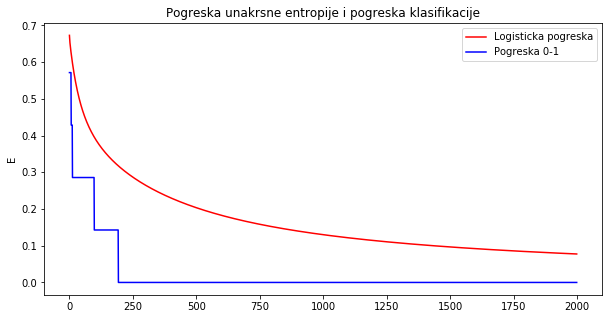

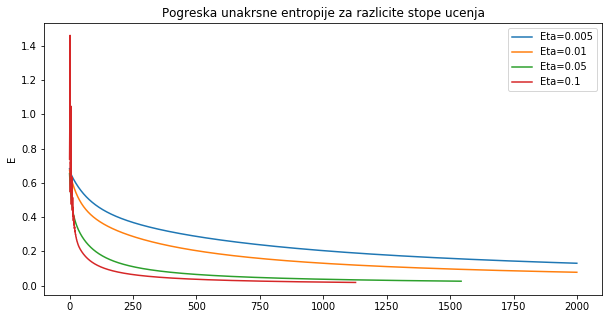

In [569]:
from sklearn.metrics import zero_one_loss

eta = [0.005, 0.01, 0.05, 0.1]

Phi = PolynomialFeatures(1).fit_transform(seven_X)

w, w_tr = lr_train(seven_X, seven_y, trace=True)
h = lambda x: x >= 0.5

error_log=[]
error_class=[]
for i in range(0, len(w_tr), 3):
    error_log.append(cross_entropy_error(seven_X, seven_y, w_tr[i:i+3]))
    error_class.append(zero_one_loss(seven_y, h(sigm(Phi.dot(w_tr[i:i+3])))))
    
figure(figsize=(10,5))
plt.title('Pogreska unakrsne entropije i pogreska klasifikacije')
plt.ylabel('E')
plot(error_log, 'r')
plot(error_class, 'b')
plt.legend(['Logisticka pogreska', 'Pogreska 0-1'], loc='best')

figure(figsize=(10,5))
plt.title('Pogreska unakrsne entropije za razlicite stope ucenja')
plt.ylabel('E')
for i in eta:
    error = []
    w, w_tr = lr_train(seven_X, seven_y, i, trace=True)
    
    for j in range(0, len(w_tr), 3):
        error.append(cross_entropy_error(seven_X, seven_y, w_tr[j:j+3]))
    
    plot(error)
plt.legend(['Eta={}'.format(eta[0]), 'Eta={}'.format(eta[1]), 'Eta={}'.format(eta[2]), 'Eta={}'.format(eta[3])], loc='best')


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

Dobivene tezine su:
[8.277650619284161, -2.4448433698085332, 0.3510113321119596]
Pogreska unakrsne entropije:  0.04741277276986071


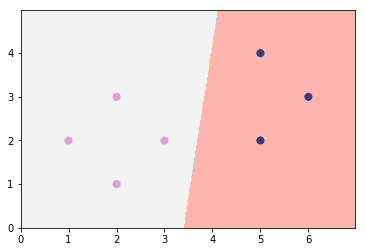

In [606]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(max_iter=2000, tol=0.0001, C=100)
logReg.fit(seven_X, seven_y)

mlutils_fer.plot_2d_clf_problem(seven_X, seven_y, lambda x : logReg.predict(x) >= 0.5)

w=[]
w.append(logReg.intercept_[0])
for i in logReg.coef_[0]:
    w.append(i)
print('Dobivene tezine su:\n{}'.format(w))

error = cross_entropy_error(seven_X,seven_y,w)
print('Pogreska unakrsne entropije: ', error)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

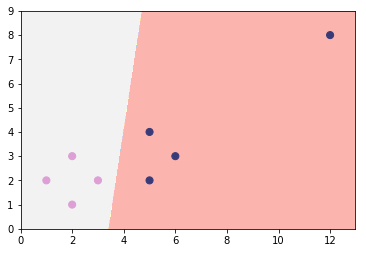

In [607]:
logReg = LogisticRegression(max_iter=2000, tol=0.0001, C=100)
logReg.fit(outlier_X, outlier_y)

mlutils_fer.plot_2d_clf_problem(outlier_X, outlier_y, lambda x : logReg.predict(x) >= 0.5)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


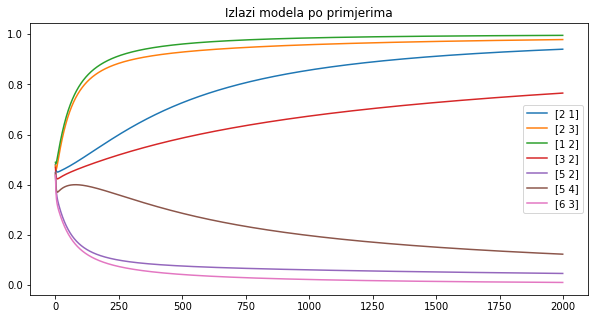

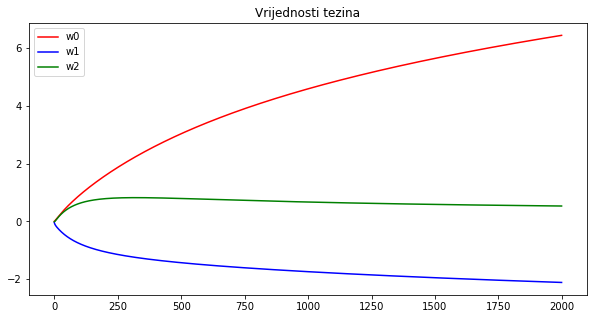

In [639]:
w, w_tr = lr_train(seven_X, seven_y, trace = True)

figure(figsize=(10,5))
plt.title('Izlazi modela po primjerima')
for i in range(0, len(seven_X)):
    h = []

    for j in range(0, len(w_tr), 3):
        h.append(lr_h(seven_X[i], w_tr[j:j+3]))
        
    plot(h)
plt.legend([seven_X[0], seven_X[1], seven_X[2], seven_X[3], seven_X[4], seven_X[5], seven_X[6]], loc='best')
    
w0 = []
w1 = []
w2 = []

for i in range(0, len(w_tr), 3):
    w0.append(w_tr[i])
    w1.append(w_tr[i+1])
    w2.append(w_tr[i+2])

figure(figsize=(10,5))
plt.title('Vrijednosti tezina')
plot(w0, 'r')
plot(w1, 'b')
plot(w2, 'g')
plt.legend(['w0', 'w1', 'w2'], loc='best')

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

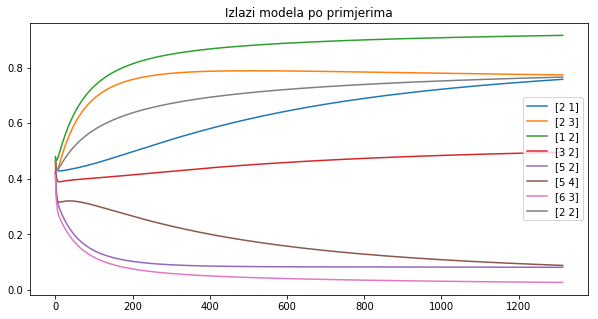

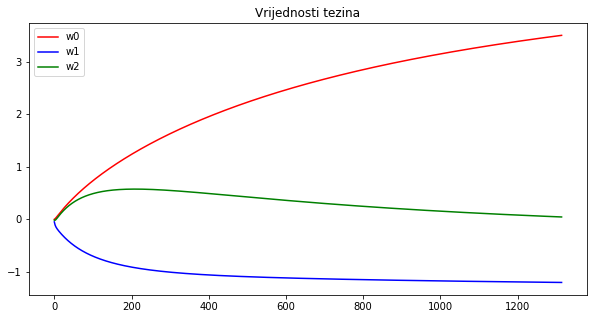

In [642]:
w, w_tr = lr_train(unsep_X, unsep_y, trace = True)

figure(figsize=(10,5))
plt.title('Izlazi modela po primjerima')
for i in range(0, len(unsep_X)):
    h = []

    for j in range(0, len(w_tr), 3):
        h.append(lr_h(unsep_X[i], w_tr[j:j+3]))
        
    plot(h)
plt.legend([unsep_X[0], unsep_X[1], unsep_X[2], unsep_X[3], unsep_X[4], unsep_X[5], unsep_X[6], unsep_X[7]], loc='best')
    
w0 = []
w1 = []
w2 = []

for i in range(0, len(w_tr), 3):
    w0.append(w_tr[i])
    w1.append(w_tr[i+1])
    w2.append(w_tr[i+2])

figure(figsize=(10,5))
plt.title('Vrijednosti tezina')
plot(w0, 'r')
plot(w1, 'b')
plot(w2, 'g')
plt.legend(['w0', 'w1', 'w2'], loc='best')

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [643]:
from numpy.linalg import norm

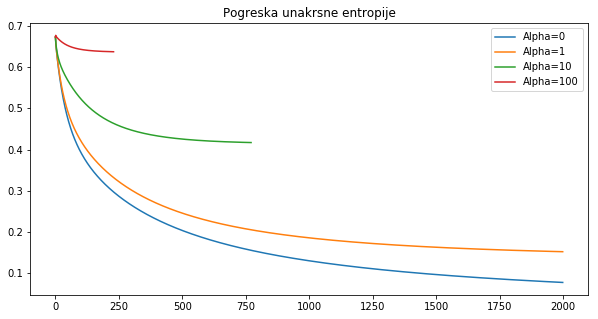

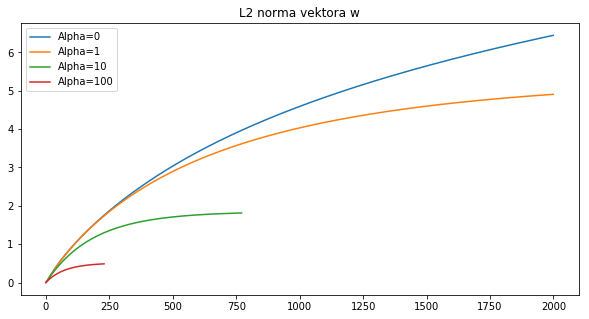

In [650]:
alpha = [0, 1, 10, 100]

figure(figsize=(10,5))
plt.title('Pogreska unakrsne entropije')
for a in alpha:
    w, w_tr = lr_train(seven_X, seven_y, trace = True, alpha=a)
    error_log=[]
    for i in range(0, len(w_tr), 3):
        error_log.append(cross_entropy_error(seven_X, seven_y, w_tr[i:i+3]))
    plot(error_log)
plt.legend(['Alpha={}'.format(alpha[0]), 'Alpha={}'.format(alpha[1]), 'Alpha={}'.format(alpha[2]), 'Alpha={}'.format(alpha[3])], loc='best')

figure(figsize=(10,5))
plt.title('L2 norma vektora w')
for a in alpha:
    w, w_tr = lr_train(seven_X, seven_y, trace = True, alpha=a)
    L2_norm=[]
    for i in range(0, len(w_tr), 3):
        L2_norm.append(norm(w_tr[i:i+1]))
    plot(L2_norm)
plt.legend(['Alpha={}'.format(alpha[0]), 'Alpha={}'.format(alpha[1]), 'Alpha={}'.format(alpha[2]), 'Alpha={}'.format(alpha[3])], loc='best')

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

Tocnost predvidanja za d=2 je: 0.9
Tocnost predvidanja za d=3 je: 0.92


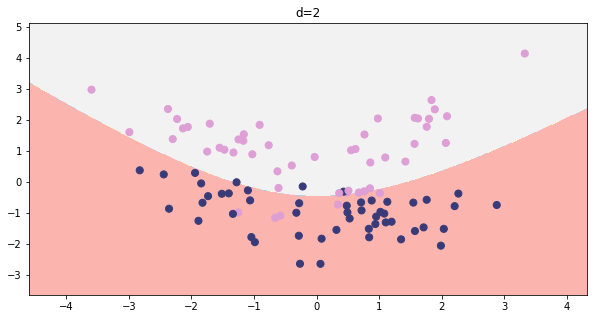

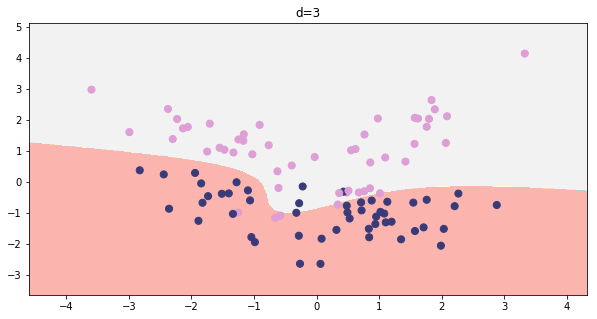

In [708]:
from sklearn.preprocessing import PolynomialFeatures

d = [2,3]

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)

for i in d:
    poly = PolyFeat(i)
    Phi = poly.fit_transform(X)
    logReg = LogisticRegression().fit(Phi, y)
    
    accuracy = accuracy_score(y, logReg.predict(Phi))
    print('Tocnost predvidanja za d={} je: {}'.format(i, accuracy))
    

    figure(figsize=(10,5))
    plt.title('d={}'.format(i))
    mlutils_fer.plot_2d_clf_problem(X, y, lambda x : logReg.predict(poly.transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?